In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import LabelEncoder
import statsmodels as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from statsmodels.api import OLS
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
communities_and_crime = fetch_ucirepo(id=183) 
X = communities_and_crime.data.features 
Y = communities_and_crime.data.targets 

In [5]:
X = X.drop(columns=["state", "county", "community", "communityname", "fold"])
X = X.replace('?',np.nan)

label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for i in categorical_columns:
    X[i] = label_encoder.fit_transform(X[i])

In [7]:
Y_centered = Y - Y.mean()
X_centered = X - X.mean(axis=0)
scaler = StandardScaler(with_mean=True, with_std=True)
X_standardized = scaler.fit_transform(X)
colnames =X.columns

In [9]:
X

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,29,0.12,0.26,0.20,6,4,62,1,0.32,14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,77,0.02,0.12,0.45,63,38,72,3,0.00,51
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,77,0.01,0.21,0.02,63,38,72,3,0.00,51
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,77,0.02,0.39,0.28,63,38,72,3,0.00,51
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,77,0.04,0.09,0.02,63,38,72,3,0.00,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,77,0.01,0.28,0.05,63,38,72,3,0.00,51
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,77,0.02,0.37,0.20,63,38,72,3,0.00,51
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,25,0.08,0.32,0.18,8,6,50,0,0.91,28
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,19,0.03,0.38,0.33,2,2,51,0,0.22,18


In [11]:
Y

,ViolentCrimesPerPop
0,0.20
1,0.67
2,0.43
3,0.12
4,0.03
...,...
1989,0.09
1990,0.45
1991,0.23
1992,0.19


In [13]:
X1 = X
Y1 = Y

In [15]:
selected_variable_names = [
    'FemalePctDiv', 'HousVacant', 'MalePctDivorce', 'NumIlleg', 'NumUnderPov',
    'PctFam2Par', 'PctHousLess3BR', 'PctHousNoPhone', 'PctHousOwnOcc', 'PctIlleg',
    'PctKids2Par', 'PctLess9thGrade', 'PctNotHSGrad', 'PctPersDenseHous', 'PctPersOwnOccup',
    'PctPolicWhite', 'PctPopUnderPov', 'PctTeen2Par', 'PctUnemployed', 'PctVacantBoarded',
    'PctYoungKids2Par', 'RacialMatchCommPol', 'TotalPctDiv', 'medFamInc', 'medIncome',
    'pctWInvInc', 'pctWPubAsst', 'racePctWhite', 'racepctblack'
]

In [17]:
forward_selected = [
    'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 'agePct16t24',
    'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
    'pctWSocSec', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
    'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
    'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
    'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
    'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
    'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
    'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
    'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
    'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart', 'OwnOccMedVal',
    'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'PctSameCity85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
    'LemasTotalReq', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
    'PctPolicWhite', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'PctUsePubTrans',
    'PolicOperBudg', 'LemasGangUnitDeploy', 'PolicBudgPerPop'
]
backward_selected = [
    'racepctblack', 'racePctHisp', 'agePct12t29', 'pctUrban', 'pctWWage',
    'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc',
    'whitePerCap', 'indianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov',
    'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu',
    'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'TotalPctDiv',
    'PctKids2Par', 'PctWorkMom', 'PctIlleg', 'NumImmig', 'PctNotSpeakEnglWell',
    'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerRentOccHous',
    'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup',
    'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'OwnOccLowQuart',
    'OwnOccMedVal', 'RentLowQ', 'MedRent', 'MedOwnCostPctInc',
    'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn',
    'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasTotalReq',
    'PolicReqPerOffic', 'PolicPerPop', 'PctPolicAsian', 'OfficAssgnDrugUnits',
    'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasGangUnitDeploy',
    'PolicBudgPerPop'
]

In [29]:
combined_variables = list(set(selected_variable_names) | set(forward_selected) | set(backward_selected))
X_selected = X[combined_variables]

In [31]:
X_selected

,PctHousOwnOcc,FemalePctDiv,PctPolicAsian,PctHousLess3BR,LemasSwFTFieldOps,blackPerCap,PctOccupMgmtProf,RacialMatchCommPol,NumIlleg,PctYoungKids2Par,...,PctPopUnderPov,MedRent,PctWorkMom,racePctHisp,RentLowQ,agePct16t24,PctOccupManu,MedRentPctHousInc,PolicPerPop,PctNotHSGrad
0,0.52,0.75,9,0.51,29,0.32,0.52,69,0.04,0.61,...,0.19,0.34,0.76,0.17,0.36,0.29,0.25,0.38,12,0.18
1,0.24,0.91,50,0.82,34,0.33,0.36,76,0.00,0.60,...,0.24,0.37,0.53,0.07,0.42,0.35,0.42,0.29,52,0.24
2,0.41,0.71,50,0.51,34,0.27,0.32,76,0.01,0.43,...,0.27,0.31,0.67,0.04,0.27,0.28,0.49,0.48,52,0.43
3,0.96,0.49,50,0.01,34,0.39,0.39,76,0.03,0.83,...,0.10,0.89,0.86,0.10,0.75,0.34,0.37,0.63,52,0.25
4,0.87,0.20,50,0.19,34,0.28,0.46,76,0.00,0.89,...,0.06,0.38,0.60,0.05,0.40,0.23,0.42,0.22,52,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.55,0.59,50,0.49,34,0.27,0.70,76,0.00,0.67,...,0.16,0.41,0.73,0.16,0.45,0.35,0.14,0.50,52,0.11
1990,0.22,0.56,50,0.60,34,0.26,0.24,76,0.03,0.69,...,0.32,0.54,0.40,0.32,0.54,0.73,0.22,0.69,52,0.37
1991,0.37,0.50,0,0.66,26,0.25,0.32,72,0.13,0.47,...,0.31,0.37,0.46,0.25,0.28,0.31,0.54,0.52,29,0.58
1992,0.33,0.30,0,0.64,30,0.29,0.48,66,0.02,0.75,...,0.16,0.64,0.63,0.10,0.58,0.63,0.27,0.43,24,0.35


==== Logistic Regression Results ====
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       291
           1       0.84      0.71      0.77       108

    accuracy                           0.88       399
   macro avg       0.87      0.83      0.85       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix:
 [[276  15]
 [ 31  77]]
ROC AUC: 0.9335

==== Random Forest Results ====
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       291
           1       0.86      0.73      0.79       108

    accuracy                           0.89       399
   macro avg       0.88      0.84      0.86       399
weighted avg       0.89      0.89      0.89       399

Confusion Matrix:
 [[278  13]
 [ 29  79]]
ROC AUC: 0.9294


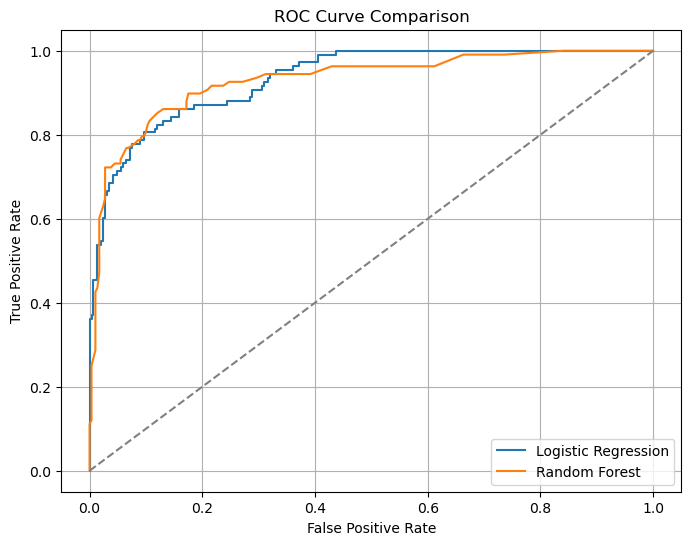

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# label
X = X_selected.copy()
y_continuous = Y['ViolentCrimesPerPop']
threshold = 0.3 
y = (y_continuous > threshold).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic回归建模
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Random Forest建模 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # 注意RF可以直接用原始特征

# 预测 
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# 评估结果
print("==== Logistic Regression Results ====")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print(f"ROC AUC: {roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:,1]):.4f}")

print("\n==== Random Forest Results ====")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]):.4f}")

# ROC曲线比较
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


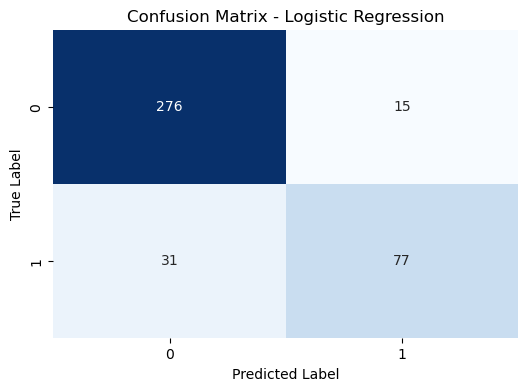

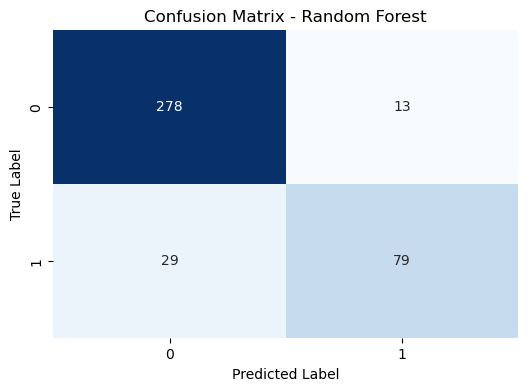

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve

# --- 1. 混淆矩阵热力图（以Logistic回归为例） ---
def plot_confusion_matrix_heatmap(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
# Logistic回归混淆矩阵
plot_confusion_matrix_heatmap(y_test, y_pred_logistic, model_name="Logistic Regression")
# Random Forest混淆矩阵
plot_confusion_matrix_heatmap(y_test, y_pred_rf, model_name="Random Forest")

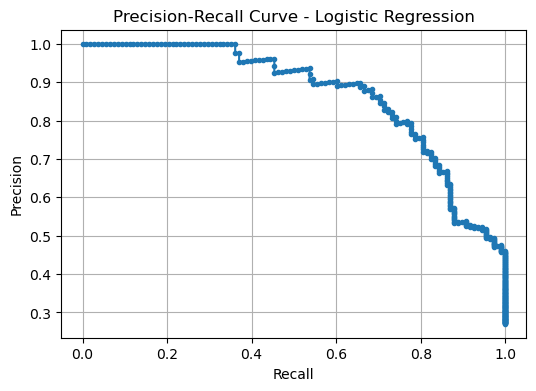

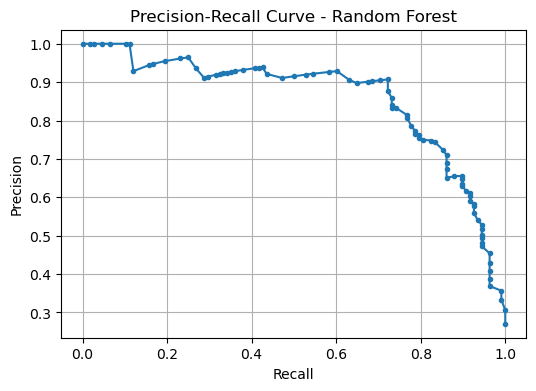

In [37]:
# --- 2. Precision-Recall曲线 ---
def plot_precision_recall(y_true, y_scores, model_name="Model"):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.grid(True)
    plt.show()

# Logistic回归PR曲线
plot_precision_recall(y_test, logistic_model.predict_proba(X_test_scaled)[:,1], model_name="Logistic Regression")

# Random Forest PR曲线
plot_precision_recall(y_test, rf_model.predict_proba(X_test)[:,1], model_name="Random Forest")

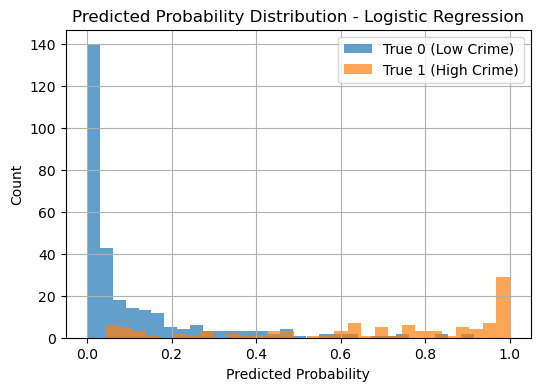

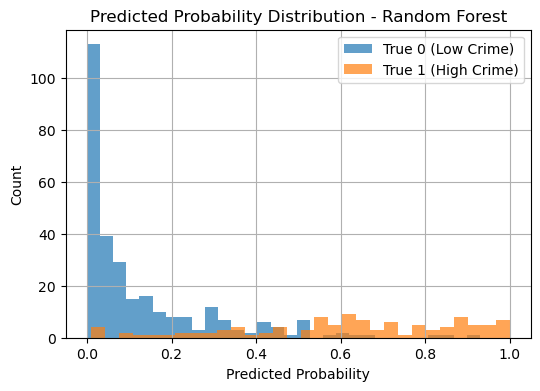

In [39]:
# --- 3. 预测概率分布直方图 ---
def plot_predicted_probability_distribution(y_true, y_scores, model_name="Model"):
    plt.figure(figsize=(6,4))
    plt.hist(y_scores[y_true==0], bins=30, alpha=0.7, label='True 0 (Low Crime)')
    plt.hist(y_scores[y_true==1], bins=30, alpha=0.7, label='True 1 (High Crime)')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Count')
    plt.title(f'Predicted Probability Distribution - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Logistic回归概率分布
plot_predicted_probability_distribution(y_test, logistic_model.predict_proba(X_test_scaled)[:,1], model_name="Logistic Regression")

# Random Forest概率分布
plot_predicted_probability_distribution(y_test, rf_model.predict_proba(X_test)[:,1], model_name="Random Forest")

In [43]:
# 重新划分训练测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 重新建模
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 拿到新的预测概率
y_scores = logistic_model.predict_proba(X_test)[:, 1]  # 注意这里[:, 1]是取正类的概率


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best threshold (max F1): 0.25


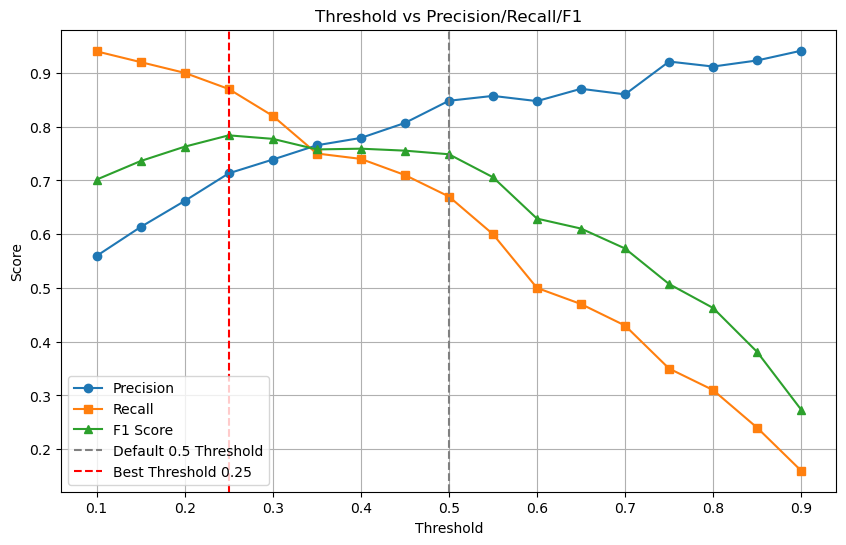

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# --- 假设 y_scores 是预测的概率，y_test 是真实标签 ---
# 比如 Logistic回归的概率输出
# y_scores = logistic_model.predict_proba(X_test_scaled)[:,1]

# --- 设定阈值范围 ---
thresholds = np.arange(0.1, 0.91, 0.05)

# --- 计算Precision/Recall/F1 ---
precisions, recalls, f1s = [], [], []

for thresh in thresholds:
    y_pred_thresh = (y_scores >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# --- 找到F1-Score最大的阈值 ---
best_idx = np.argmax(f1s)
best_threshold = thresholds[best_idx]
print(f"Best threshold (max F1): {best_threshold:.2f}")

# --- 绘制图形 ---
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='s', label='Recall')
plt.plot(thresholds, f1s, marker='^', label='F1 Score')

# 标记默认0.5
plt.axvline(0.5, color='gray', linestyle='--', label='Default 0.5 Threshold')

# 标记自动选择的最优阈值
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Best Threshold {best_threshold:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision/Recall/F1')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
# --- 导入必要的包 ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- 1. 特征和标签准备 ---
X = X_selected.copy()
y_continuous = Y['ViolentCrimesPerPop']

# 自定义二分类标签
threshold_for_classification = 0.3
y = (y_continuous > threshold_for_classification).astype(int)

# --- 2. 划分数据 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. 标准化 ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. 建立模型（Logistic回归） ---
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# --- 5. 预测概率 ---
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# --- 6. 使用自定义阈值做预测（不是默认0.5） ---
best_threshold = 0.25  
y_pred_custom = (y_scores_logistic >= best_threshold).astype(int)


Performance with threshold 0.25:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       291
           1       0.68      0.83      0.75       108

    accuracy                           0.85       399
   macro avg       0.81      0.84      0.82       399
weighted avg       0.86      0.85      0.85       399

Confusion Matrix:
 [[249  42]
 [ 18  90]]
ROC AUC: 0.9335


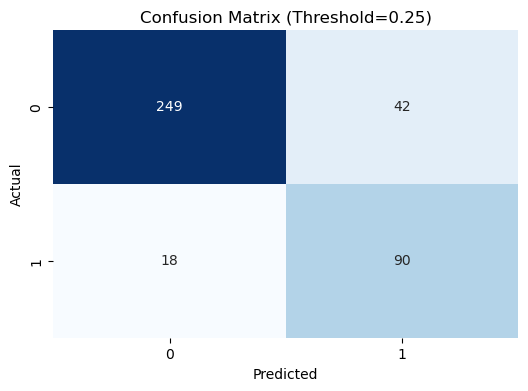

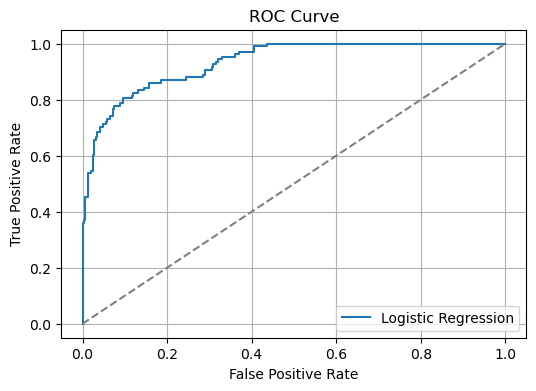

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# --- 1. 打印性能指标 ---
print(f"Performance with threshold {best_threshold:.2f}:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print(f"ROC AUC: {roc_auc_score(y_test, y_scores_logistic):.4f}")  # 注意ROC AUC还是用原始分数算，不受阈值影响

# --- 2. 混淆矩阵可视化 ---
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold={best_threshold:.2f})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 3. ROC曲线绘制 ---
fpr, tpr, _ = roc_curve(y_test, y_scores_logistic)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Best threshold for Random Forest (max F1): 0.45


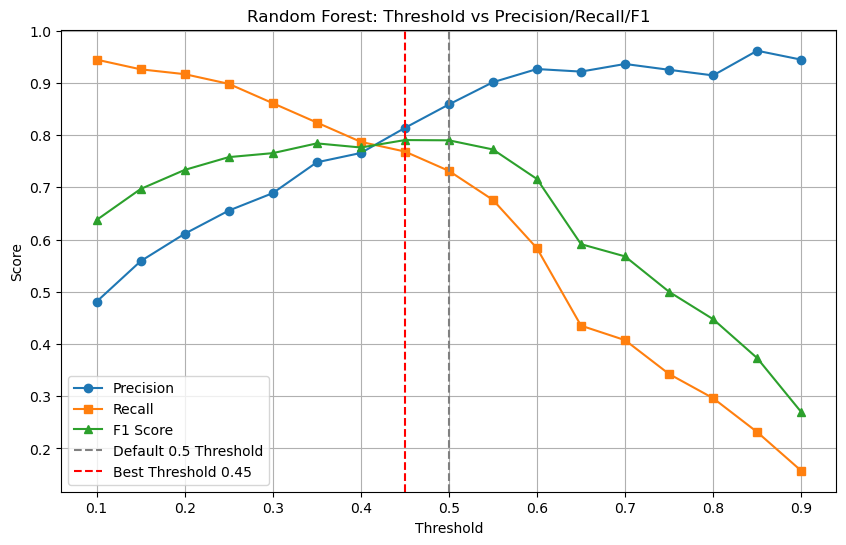

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# --- 1. 获取Random Forest的预测概率 ---
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]  # 注意是[:,1]拿正类（高犯罪区）的概率

# --- 2. 设置阈值范围 ---
thresholds = np.arange(0.1, 0.91, 0.05)  # 从0.1到0.9，每隔0.05

# --- 3. 计算每个阈值下的Precision, Recall, F1 ---
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    y_pred_thresh = (y_scores_rf >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# --- 4. 找到F1最高对应的阈值 ---
best_idx = np.argmax(f1s)
best_threshold_rf = thresholds[best_idx]
print(f"Best threshold for Random Forest (max F1): {best_threshold_rf:.2f}")

# --- 5. 画图 ---
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='s', label='Recall')
plt.plot(thresholds, f1s, marker='^', label='F1 Score')

# --- 标注 ---
plt.axvline(0.5, color='gray', linestyle='--', label='Default 0.5 Threshold')
plt.axvline(best_threshold_rf, color='red', linestyle='--', label=f'Best Threshold {best_threshold_rf:.2f}')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Random Forest: Threshold vs Precision/Recall/F1')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# --- 导入必要的包 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- 1. 特征和标签准备 ---
X = X_selected.copy()
y_continuous = Y['ViolentCrimesPerPop']

# 自定义二分类标签
threshold_for_classification = 0.3
y = (y_continuous > threshold_for_classification).astype(int)

# --- 2. 划分训练集和测试集 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. （Random Forest不需要标准化，所以跳过）

# --- 4. 建立Random Forest模型 ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- 5. 预测概率 ---
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# --- 6. 自定义阈值分类 ---
custom_threshold_rf = 0.45
y_pred_rf_custom = (y_scores_rf >= custom_threshold_rf).astype(int)

Random Forest Performance with threshold 0.45:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       291
           1       0.81      0.77      0.79       108

    accuracy                           0.89       399
   macro avg       0.86      0.85      0.86       399
weighted avg       0.89      0.89      0.89       399

Confusion Matrix:
 [[271  20]
 [ 25  83]]
ROC AUC: 0.9294


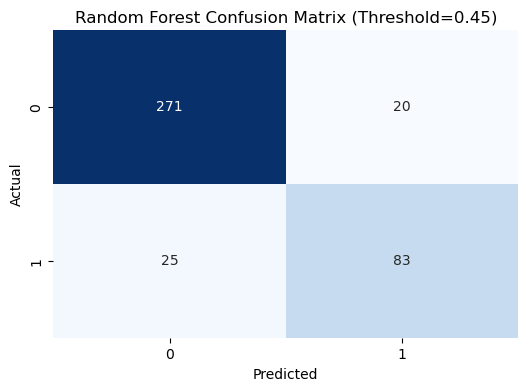

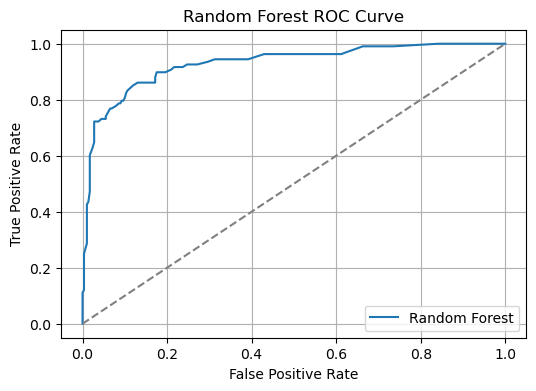

In [55]:
# --- 7. 评估结果 ---
print(f"Random Forest Performance with threshold {custom_threshold_rf:.2f}:")
print(classification_report(y_test, y_pred_rf_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_custom))
print(f"ROC AUC: {roc_auc_score(y_test, y_scores_rf):.4f}")  # 注意ROC AUC还是用原始分数算

# --- 8. 混淆矩阵可视化 ---
cm_rf = confusion_matrix(y_test, y_pred_rf_custom)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title(f"Random Forest Confusion Matrix (Threshold={custom_threshold_rf:.2f})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 9. ROC曲线绘制 ---
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

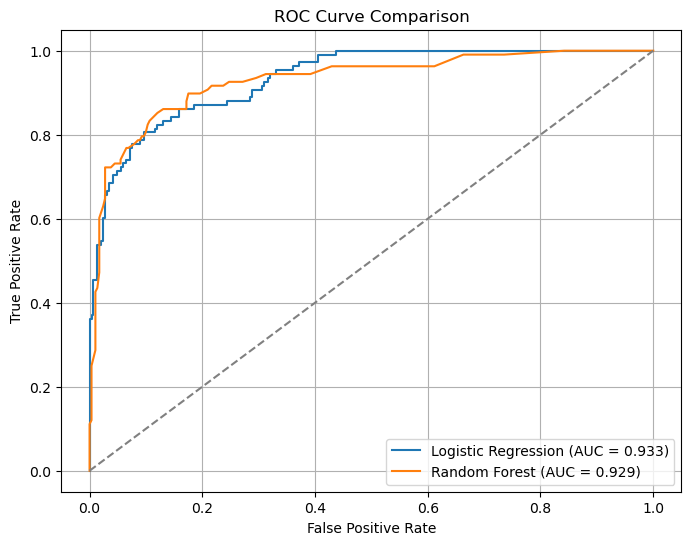

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# --- 1. 获取每个模型的预测概率 ---
# 假设你已经有
# y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
# y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# --- 2. 分别计算ROC曲线坐标 ---
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_scores_logistic)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)

# --- 3. 绘制在同一张图上 ---
plt.figure(figsize=(8,6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_scores_logistic):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_scores_rf):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


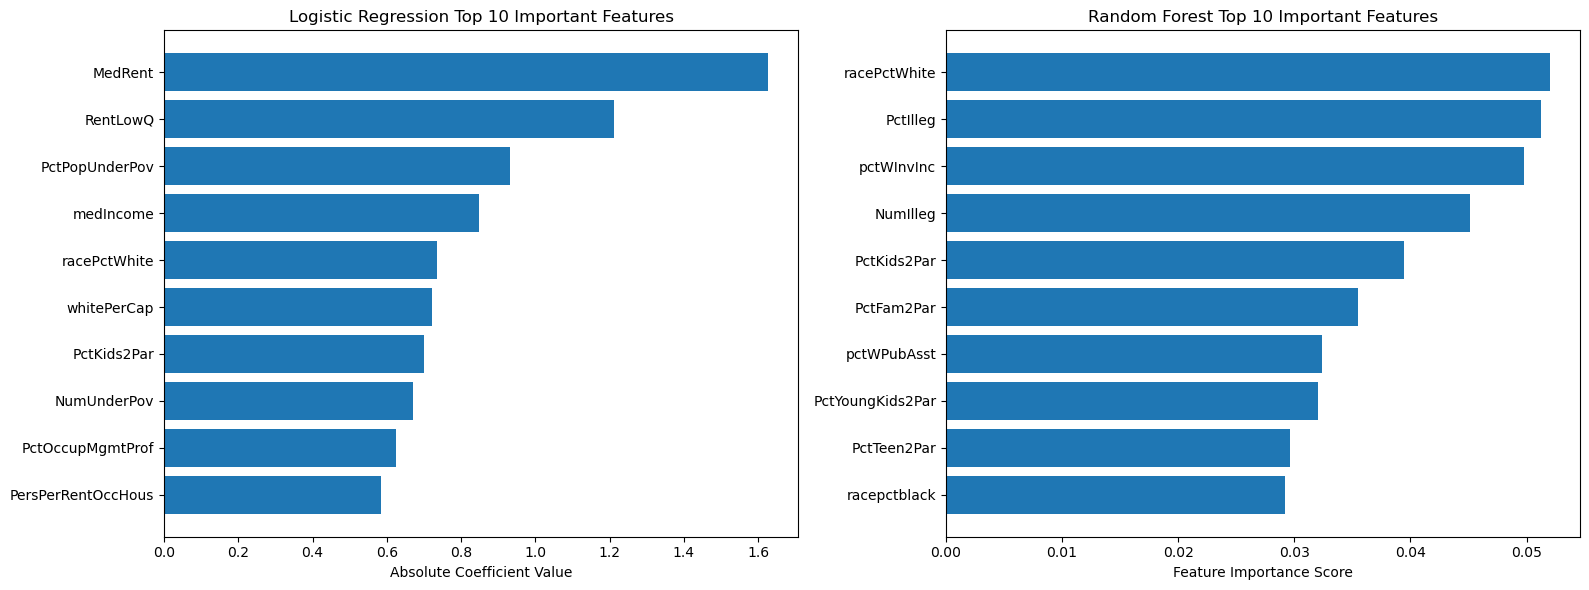

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Logistic Regression重要性 ---
# Logistic回归的特征重要性=系数绝对值
coef_logistic = pd.Series(np.abs(logistic_model.coef_[0]), index=X_selected.columns)
coef_logistic_top10 = coef_logistic.sort_values(ascending=False).head(10)

# --- 2. Random Forest重要性 ---
# RF的特征重要性=feature_importances_
importance_rf = pd.Series(rf_model.feature_importances_, index=X_selected.columns)
importance_rf_top10 = importance_rf.sort_values(ascending=False).head(10)

# --- 3. 绘制两个子图并列展示 ---
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Logistic回归Top10
axes[0].barh(coef_logistic_top10.index[::-1], coef_logistic_top10.values[::-1])  # 逆序画成从大到小
axes[0].set_title('Logistic Regression Top 10 Important Features')
axes[0].set_xlabel('Absolute Coefficient Value')

# Random Forest Top10
axes[1].barh(importance_rf_top10.index[::-1], importance_rf_top10.values[::-1])
axes[1].set_title('Random Forest Top 10 Important Features')
axes[1].set_xlabel('Feature Importance Score')

plt.tight_layout()
plt.show()


In [78]:
!pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45440 sha256=00d37d945fe3b51e80b2c548e274e15da3f8730a1444ea481fae4f1b86d4e900
  Stored in directory: c:\users\17376\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


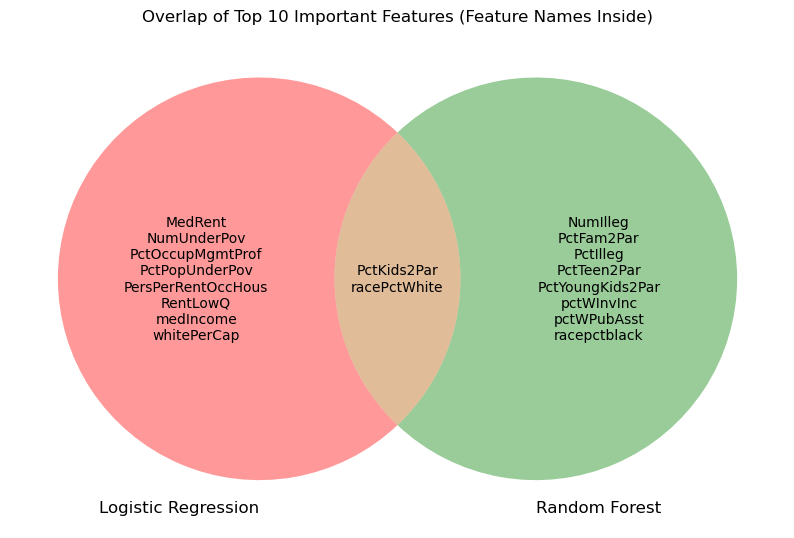

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# --- 1. 重新计算特征重要性（如果需要） ---
coef_logistic = pd.Series(np.abs(logistic_model.coef_[0]), index=X_selected.columns)
importance_rf = pd.Series(rf_model.feature_importances_, index=X_selected.columns)

# --- 2. 取Top10重要特征 ---
top10_logistic = coef_logistic.sort_values(ascending=False).head(10)
top10_rf = importance_rf.sort_values(ascending=False).head(10)

# --- 3. 集合处理 ---
set_logistic = set(top10_logistic.index)
set_rf = set(top10_rf.index)

# --- 4. 画Venn图 ---
plt.figure(figsize=(10,8))
venn = venn2([set_logistic, set_rf], set_labels=('Logistic Regression', 'Random Forest'))

# --- 5. 在Venn区域内添加特征名字 ---

# Logistic独有
if venn.get_label_by_id('10'):
    venn.get_label_by_id('10').set_text('\n'.join(sorted(set_logistic - set_rf)))

# Random Forest独有
if venn.get_label_by_id('01'):
    venn.get_label_by_id('01').set_text('\n'.join(sorted(set_rf - set_logistic)))

# 两边共有
if venn.get_label_by_id('11'):
    venn.get_label_by_id('11').set_text('\n'.join(sorted(set_logistic & set_rf)))

# --- 6. 标题 ---
plt.title('Overlap of Top 10 Important Features (Feature Names Inside)')
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\17376\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


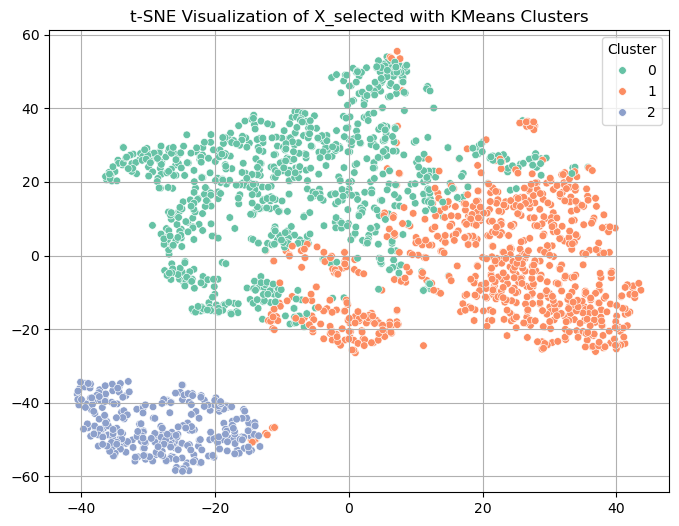

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# --- 1. 标准化 ---
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X_selected)

# --- 2. KMeans聚类 ---
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_selected_scaled)

# --- 3. t-SNE降维 ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_selected_tsne = tsne.fit_transform(X_selected_scaled)

# --- 4. 绘制t-SNE聚类结果 ---
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_selected_tsne[:,0], y=X_selected_tsne[:,1], hue=cluster_labels, palette='Set2', s=30)
plt.title('t-SNE Visualization of X_selected with KMeans Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [65]:
# 复制一份X_selected
X_labeled = X_selected.copy()

# 添加一列叫'cluster_label'
X_labeled['cluster_label'] = cluster_labels

# 展示一下结果
X_labeled.head()


,PctHousOwnOcc,FemalePctDiv,PctPolicAsian,PctHousLess3BR,LemasSwFTFieldOps,blackPerCap,PctOccupMgmtProf,RacialMatchCommPol,NumIlleg,PctYoungKids2Par,...,MedRent,PctWorkMom,racePctHisp,RentLowQ,agePct16t24,PctOccupManu,MedRentPctHousInc,PolicPerPop,PctNotHSGrad,cluster_label
0,0.52,0.75,9,0.51,29,0.32,0.52,69,0.04,0.61,...,0.34,0.76,0.17,0.36,0.29,0.25,0.38,12,0.18,2
1,0.24,0.91,50,0.82,34,0.33,0.36,76,0.00,0.60,...,0.37,0.53,0.07,0.42,0.35,0.42,0.29,52,0.24,0
2,0.41,0.71,50,0.51,34,0.27,0.32,76,0.01,0.43,...,0.31,0.67,0.04,0.27,0.28,0.49,0.48,52,0.43,0
3,0.96,0.49,50,0.01,34,0.39,0.39,76,0.03,0.83,...,0.89,0.86,0.10,0.75,0.34,0.37,0.63,52,0.25,1
4,0.87,0.20,50,0.19,34,0.28,0.46,76,0.00,0.89,...,0.38,0.60,0.05,0.40,0.23,0.42,0.22,52,0.30,1


In [67]:
# 按照 cluster_label 分组并计算均值
cluster_summary = X_labeled.groupby('cluster_label').mean().T  # 注意.T是转置！
# 可选：加上每列的标准差
cluster_summary['std'] = X_labeled.drop(columns='cluster_label').std()
# 展示结果
cluster_summary

cluster_label,0,1,2,std
PctHousOwnOcc,0.480145,0.681006,0.412387,0.185204
FemalePctDiv,0.549321,0.372013,0.601097,0.175170
PctPolicAsian,50.000000,49.478981,8.003226,16.324407
PctHousLess3BR,0.562636,0.373834,0.606871,0.172508
LemasSwFTFieldOps,34.000000,33.951592,26.722581,3.762043
...,...,...,...,...
agePct16t24,0.377953,0.274828,0.370935,0.166505
PctOccupManu,0.504917,0.258548,0.397484,0.198922
MedRentPctHousInc,0.518498,0.436471,0.543710,0.169500
PolicPerPop,52.000000,51.642038,19.135484,12.722286


In [69]:
# 1. 合并 X_labeled 和 Y
XY_labeled = X_labeled.copy()
XY_labeled['ViolentCrimesPerPop'] = Y.values.flatten()  # 保证是一维加进去
# 2. 按 cluster_label 分组，统计 summary
cluster_summary_y = XY_labeled.groupby('cluster_label').agg({
    'ViolentCrimesPerPop': ['mean', 'std', 'min', 'max']
})
# 3. 展示结果
cluster_summary_y


ViolentCrimesPerPop                     
                             mean       std   min  max
cluster_label                                         
0                        0.280945  0.229548  0.00  1.0
1                        0.104382  0.099934  0.00  1.0
2                        0.451677  0.274064  0.02  1.0

Performance with threshold 0.45:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       291
           1       0.80      0.74      0.77       108

    accuracy                           0.88       399
   macro avg       0.85      0.84      0.84       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix:
 [[271  20]
 [ 28  80]]
ROC AUC: 0.9335


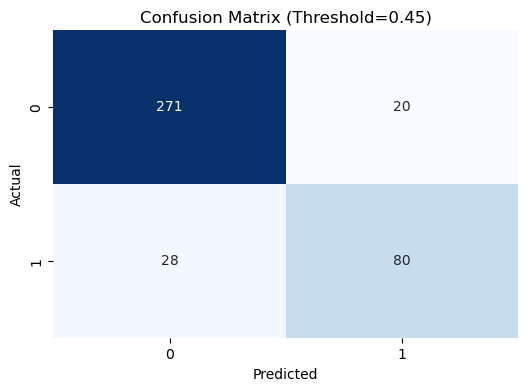

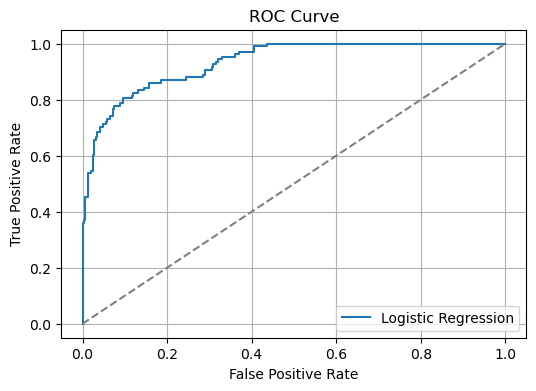

In [71]:
# --- 导入必要的包 ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# --- 1. 特征和标签准备 ---
X = X_selected.copy()
y_continuous = Y['ViolentCrimesPerPop']

# 自定义二分类标签
threshold_for_classification = 0.3
y = (y_continuous > threshold_for_classification).astype(int)

# --- 2. 划分数据 ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. 标准化 ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. 建立模型（Logistic回归） ---
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# --- 5. 预测概率 ---
y_scores_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

# --- 6. 使用自定义阈值做预测（不是默认0.5） ---
best_threshold = 0.45  
y_pred_custom = (y_scores_logistic >= best_threshold).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score

# --- 1. 打印性能指标 ---
print(f"Performance with threshold {best_threshold:.2f}:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print(f"ROC AUC: {roc_auc_score(y_test, y_scores_logistic):.4f}")  # 注意ROC AUC还是用原始分数算，不受阈值影响

# --- 2. 混淆矩阵可视化 ---
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_custom)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.title(f"Confusion Matrix (Threshold={best_threshold:.2f})")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 3. ROC曲线绘制 ---
fpr, tpr, _ = roc_curve(y_test, y_scores_logistic)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.2/150.0 MB 29.0 MB/s eta 0:00:05
   ---- ----------------------------------- 16.5/150.0 MB 41.6 MB/s eta 0:00:04
   ------ --------------------------------- 25.2/150.0 MB 41.9 MB/s eta 0:00:03
   --------- ------------------------------ 33.8/150.0 MB 41.3 MB/s eta 0:00:03
   ----------- ---------------------------- 41.7/150.0 MB 40.8 MB/s eta 0:00:03
   ------------- -------------------------- 51.4/150.0 MB 41.9 MB/s eta 0:00:03
   ---------------- ----------------------- 61.6/150.0 MB 42.7 MB/s eta 0:00:03
   ------------------- -------------------- 71.6/150.0 MB 43.5 MB/s eta 0:00:02
   ---------------------- ----------------- 82.6/150.0 MB 44.6 MB/s eta 0:00:02
   ------------------------ --------------- 91.0/150.0 MB 44.3 MB/s eta 0:00:02
   ------------------------- -------------- 95.7/150.0 MB 43.3 MB/s eta 0:00:02
   -------------------------- ------------- 98.0/1

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 建立模型
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 拟合
xgb_model.fit(X_train, y_train)

# 预测概率
y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 预测类别
y_pred_xgb = (y_scores_xgb >= 0.5).astype(int)

# 打印评估指标
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_scores_xgb))


C:\Users\17376\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:12:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       291
           1       0.82      0.73      0.77       108

    accuracy                           0.88       399
   macro avg       0.86      0.84      0.85       399
weighted avg       0.88      0.88      0.88       399

ROC AUC: 0.9242713503881889


In [79]:
!pip install catboost

   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   -- ------------------------------------- 5.2/102.4 MB 29.0 MB/s eta 0:00:04
   ----- ---------------------------------- 14.9/102.4 MB 39.1 MB/s eta 0:00:03
   --------- ------------------------------ 24.1/102.4 MB 41.3 MB/s eta 0:00:02
   ------------ --------------------------- 32.2/102.4 MB 40.1 MB/s eta 0:00:02
   --------------- ------------------------ 39.3/102.4 MB 39.1 MB/s eta 0:00:02
   ---------------- ----------------------- 43.0/102.4 MB 35.1 MB/s eta 0:00:02
   ----------------- ---------------------- 45.1/102.4 MB 31.9 MB/s eta 0:00:02
   --------------------- ------------------ 54.5/102.4 MB 33.1 MB/s eta 0:00:02
   ------------------------ --------------- 64.0/102.4 MB 34.8 MB/s eta 0:00:02
   ----------------------------- ---------- 74.7/102.4 MB 36.4 MB/s eta 0:00:01
   ---------------------------------- ----- 87.6/102.4 MB 38.5 MB/s eta 0:00:01
   ------------------------------------- -- 95.9/1

0:	learn: 0.6119318	total: 110ms	remaining: 54.7s
100:	learn: 0.1286687	total: 1.07s	remaining: 4.24s
200:	learn: 0.0543540	total: 2.03s	remaining: 3.02s
300:	learn: 0.0268244	total: 3.17s	remaining: 2.1s
400:	learn: 0.0161942	total: 4.32s	remaining: 1.07s
499:	learn: 0.0108369	total: 5.46s	remaining: 0us
=== CatBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       299
           1       0.81      0.69      0.75       100

    accuracy                           0.88       399
   macro avg       0.86      0.82      0.83       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix:
[[283  16]
 [ 31  69]]
ROC AUC Score: 0.9285


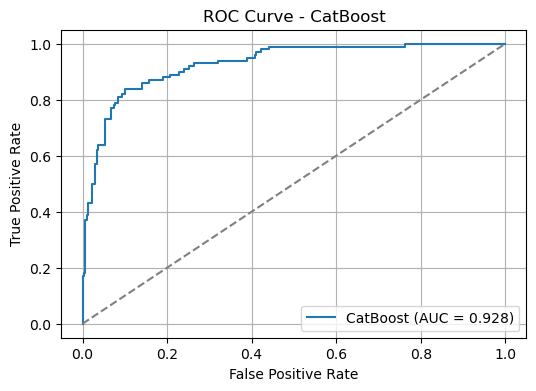

In [81]:
# --- 1. 安装 (如果还没装的话) ---
# pip install catboost

# --- 2. 导入需要的包 ---
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- 3. 划分训练集和测试集 ---
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# --- 4. 建立 CatBoost 模型 ---
model_catboost = CatBoostClassifier(
    iterations=500,      # 树的数量（一般100-1000）
    learning_rate=0.1,   # 学习率
    depth=6,             # 树深度
    verbose=100,         # 每100次迭代打印一次进度
    random_state=42
)

# --- 5. 模型训练 ---
model_catboost.fit(X_train, y_train)

# --- 6. 模型预测 ---
y_pred = model_catboost.predict(X_test)
y_proba = model_catboost.predict_proba(X_test)[:, 1]  # 预测类别为1的概率

# --- 7. 结果展示 ---
print("=== CatBoost Classification Report ===")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# --- 8. 画出 ROC 曲线 ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'CatBoost (AUC = {roc_auc_score(y_test, y_proba):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\17376\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:16:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


==== XGBoost Results (Threshold = 0.45) ====
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       291
           1       0.81      0.74      0.77       108

    accuracy                           0.88       399
   macro avg       0.86      0.84      0.85       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix (XGBoost):
 [[272  19]
 [ 28  80]]
ROC AUC (XGBoost): 0.9240


==== CatBoost Results (Threshold = 0.45) ====
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       291
           1       0.81      0.75      0.78       108

    accuracy                           0.88       399
   macro avg       0.86      0.84      0.85       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix (CatBoost):
 [[272  19]
 [ 27  81]]
ROC AUC (CatBoost): 0.9256


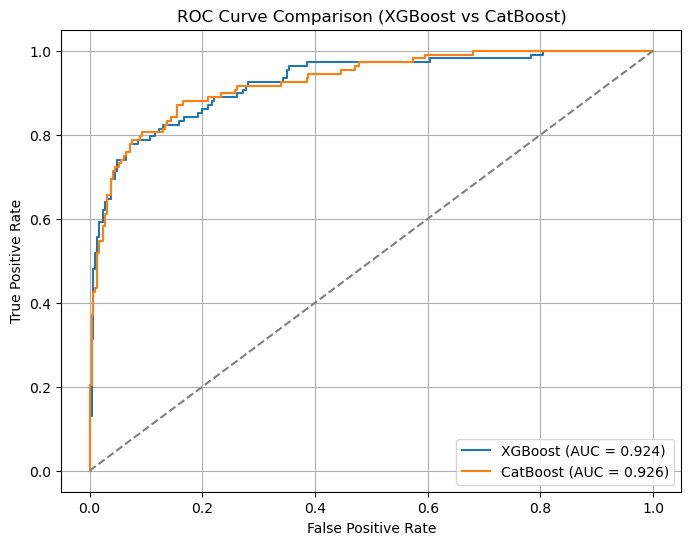

In [85]:

# --- 1. 导入必要的包 ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# --- 2. 数据划分 ---
# X_selected: 特征表
# y: 目标变量（0/1，高犯罪率）
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. 建立XGBoost模型 ---
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# --- 4. 建立CatBoost模型 ---
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train)

# --- 5. 预测概率 ---
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# --- 6. 按照0.45阈值分类 ---
threshold = 0.45

y_pred_xgb = (y_proba_xgb >= threshold).astype(int)
y_pred_cat = (y_proba_cat >= threshold).astype(int)

# --- 7. 评估XGBoost ---
print("==== XGBoost Results (Threshold = 0.45) ====")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))
print(f"ROC AUC (XGBoost): {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("\n")

# --- 8. 评估CatBoost ---
print("==== CatBoost Results (Threshold = 0.45) ====")
print(classification_report(y_test, y_pred_cat))
print("Confusion Matrix (CatBoost):\n", confusion_matrix(y_test, y_pred_cat))
print(f"ROC AUC (CatBoost): {roc_auc_score(y_test, y_proba_cat):.4f}")

# --- 9. 可选：绘制ROC曲线比较 ---
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_proba_cat)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.3f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {roc_auc_score(y_test, y_proba_cat):.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (XGBoost vs CatBoost)')
plt.legend()
plt.grid(True)
plt.show()


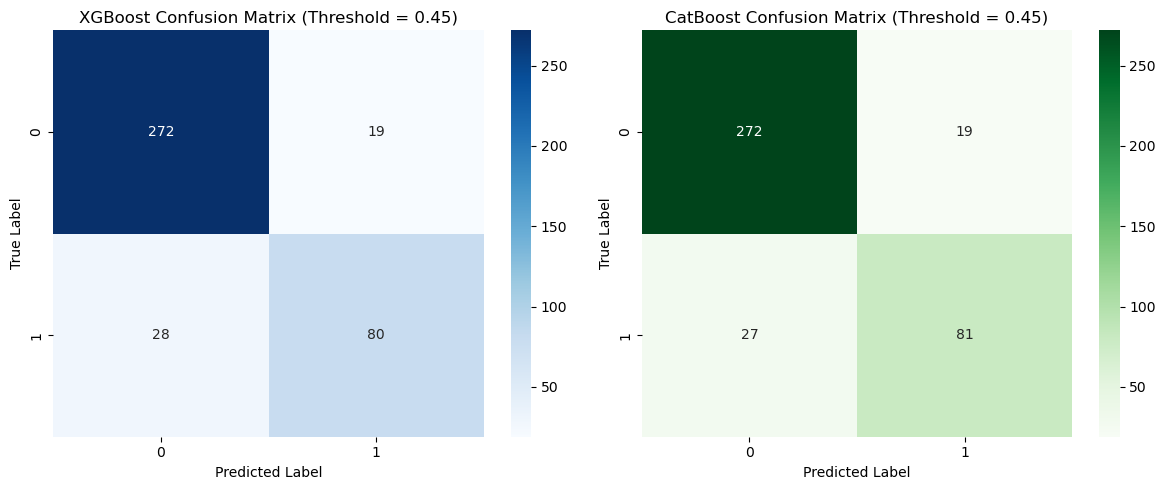

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- 计算混淆矩阵 ---
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_cat = confusion_matrix(y_test, y_pred_cat)

# --- 绘制 ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 一行两列子图

# XGBoost混淆矩阵
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('XGBoost Confusion Matrix (Threshold = 0.45)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# CatBoost混淆矩阵
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('CatBoost Confusion Matrix (Threshold = 0.45)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [89]:
# --- 1. 导入PCA ---
from sklearn.decomposition import PCA
# --- 2. 初始化PCA模型，保留前20个主成分 ---
pca = PCA(n_components=20)
# --- 3. 拟合PCA并转换数据 ---
X_pca_array = pca.fit_transform(X)
# --- 4. 转换成DataFrame格式，列名叫 PC1, PC2, ..., PC20 ---
X_PCA = pd.DataFrame(X_pca_array, columns=[f'PC{i+1}' for i in range(20)])
print(X_PCA.shape)
X_PCA.head()


(1994, 20)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-99.471684,8.761102,30.724488,14.502707,1.875141,-4.291025,-3.176917,-3.754054,1.905518,-1.184644,-0.781587,0.233314,-1.291927,-0.407586,0.204646,-0.132517,0.079760,-0.325474,0.302794,0.079503
1,19.566019,-6.585391,0.283235,-0.066495,-0.234200,0.163510,0.079486,0.035439,-0.041064,0.034106,0.012139,0.113660,0.012081,0.176419,1.024396,-0.044090,0.448770,-0.292625,-0.154037,0.123652
2,19.622349,-0.599000,0.185843,-0.035572,-0.186349,0.094962,0.035939,0.081668,-0.091551,0.042159,-0.005357,0.708445,0.090912,-0.295089,0.136113,-0.162542,-0.165257,0.082513,0.360732,0.093496
3,19.692527,7.422787,0.063467,0.018700,-0.118668,0.010355,0.000466,0.054706,-0.096033,0.077324,-0.026324,-0.243945,-0.050232,0.514949,-0.015565,0.443640,-0.065487,-0.043286,1.253693,-0.181985
4,19.831684,22.420075,-0.129524,0.107572,0.016030,-0.159277,-0.088313,0.063811,-0.094248,0.087393,-0.005722,-0.486806,-0.085388,-0.367357,-0.448119,0.405731,0.195166,-0.144954,0.023878,-0.080628


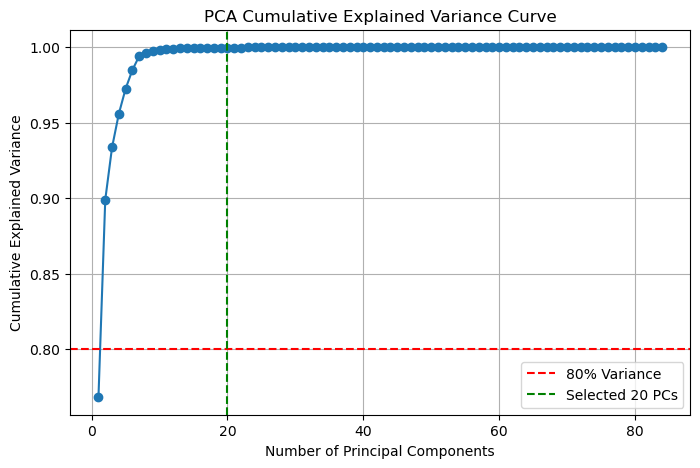

In [91]:
# --- 累计解释方差率绘图 ---
import matplotlib.pyplot as plt

# 重新用所有成分拟合一下PCA（这样可以看到全部解释量变化）
pca_full = PCA()
pca_full.fit(X)

# 计算每个主成分解释的方差比例
explained_var_ratio = pca_full.explained_variance_ratio_

# 计算累计解释方差比例
cumulative_var_ratio = explained_var_ratio.cumsum()

# --- 绘图 ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance Curve')
plt.grid(True)
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')  # 可选：画一条参考线
plt.axvline(x=20, color='g', linestyle='--', label='Selected 20 PCs')  # 你选了20个
plt.legend()
plt.show()


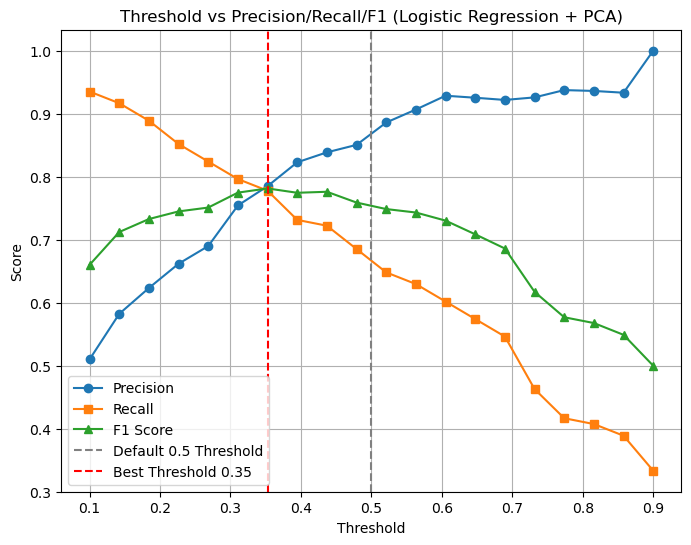

Best threshold based on F1 score: 0.35


In [95]:
# --- 画Precision-Recall-F1 vs Threshold图 ---
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# --- 1. 设置阈值列表 ---
thresholds = np.linspace(0.1, 0.9, 20)  # 从0.1到0.9，均匀取20个点
precisions = []
recalls = []
f1s = []

# --- 2. 计算每个阈值下的precision/recall/f1 ---
for thresh in thresholds:
    y_pred_thresh = (y_proba_logistic >= thresh).astype(int)
    precisions.append(precision_score(y_test, y_pred_thresh))
    recalls.append(recall_score(y_test, y_pred_thresh))
    f1s.append(f1_score(y_test, y_pred_thresh))

# --- 3. 绘制图 ---
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions, marker='o', label='Precision')
plt.plot(thresholds, recalls, marker='s', label='Recall')
plt.plot(thresholds, f1s, marker='^', label='F1 Score')

# 默认0.5线
plt.axvline(x=0.5, linestyle='--', color='gray', label='Default 0.5 Threshold')

# 最佳F1分数对应的阈值线
best_idx = np.argmax(f1s)
best_thresh = thresholds[best_idx]
plt.axvline(x=best_thresh, linestyle='--', color='red', label=f'Best Threshold {best_thresh:.2f}')

# 图形美化
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs Precision/Recall/F1 (Logistic Regression + PCA)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best threshold based on F1 score: {best_thresh:.2f}")


==== Logistic Regression Results (Threshold = 0.35) ====
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       291
           1       0.79      0.78      0.78       108

    accuracy                           0.88       399
   macro avg       0.85      0.85      0.85       399
weighted avg       0.88      0.88      0.88       399

Confusion Matrix:
 [[268  23]
 [ 24  84]]
ROC AUC: 0.9305


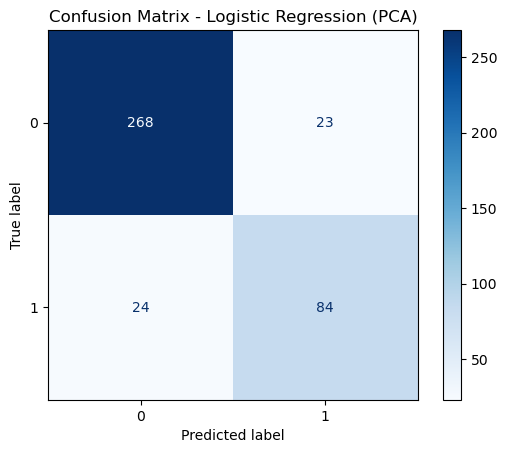

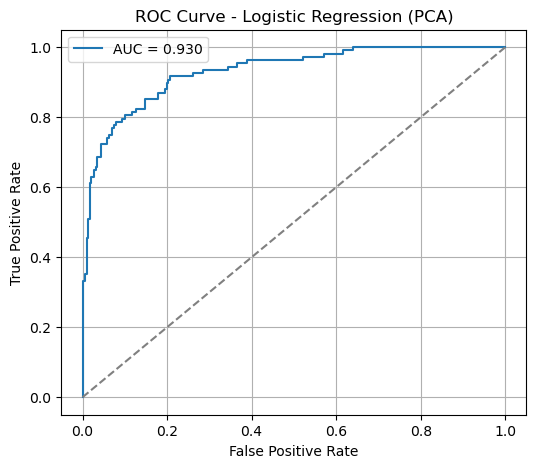

In [97]:
# --- 1. 导入必要的包 ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 2. 数据划分 ---
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. 建立Logistic模型 ---
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# --- 4. 预测 ---
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# --- 5. 按0.35阈值分类 ---
threshold = 0.35
y_pred_logistic = (y_proba_logistic >= threshold).astype(int)

# --- 6. 打印评估结果 ---
print("==== Logistic Regression Results (Threshold = 0.35) ====")
print(classification_report(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_logistic):.4f}")

# --- 7. 绘制混淆矩阵 ---
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (PCA)')
plt.show()

# --- 8. 绘制ROC曲线 ---
fpr, tpr, _ = roc_curve(y_test, y_proba_logistic)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba_logistic):.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (PCA)')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
# --- 1. 用PCA后的数据划分训练集和测试集 ---
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. 用降维后的数据重新训练随机森林模型 ---
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train_pca, y_train)

# --- 3. 预测 ---
y_proba_rf = rf_model.predict_proba(X_test_pca)[:, 1]

# --- 4. 按0.45阈值分类 ---
threshold = 0.45
y_pred_rf = (y_proba_rf >= threshold).astype(int)

# --- 5. 展示结果 ---
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("==== Random Forest Results (PCA Features, Threshold=0.45) ====")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))
print(f"ROC AUC (Random Forest): {roc_auc_score(y_test, y_proba_rf):.4f}")


==== Random Forest Results (PCA Features, Threshold=0.45) ====
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       291
           1       0.77      0.73      0.75       108

    accuracy                           0.87       399
   macro avg       0.83      0.82      0.83       399
weighted avg       0.87      0.87      0.87       399

Confusion Matrix (Random Forest):
 [[267  24]
 [ 29  79]]
ROC AUC (Random Forest): 0.9143


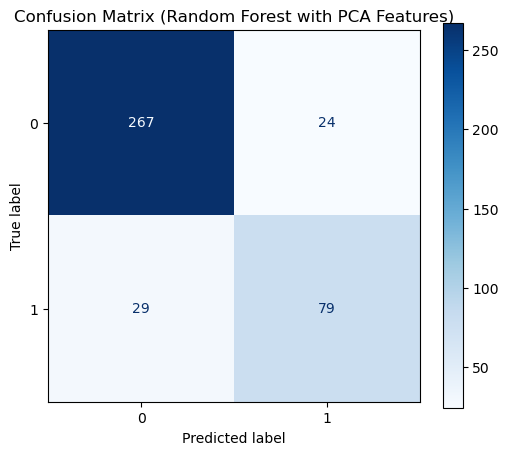

In [109]:
# --- 混淆矩阵 ---
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred_rf)

# 绘制混淆矩阵
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues")
plt.title('Confusion Matrix (Random Forest with PCA Features)')
plt.grid(False)
plt.show()


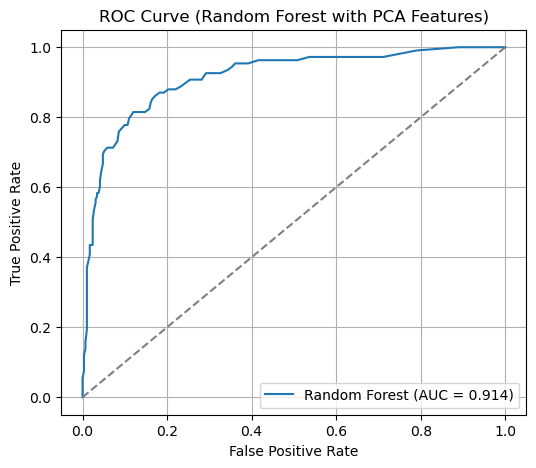

In [111]:
# --- ROC曲线 ---
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest with PCA Features)')
plt.legend()
plt.grid(True)
plt.show()


In [113]:
# --- 导入包 ---
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- 训练XGBoost ---
xgb_model_pca = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=300,
    random_state=42
)
xgb_model_pca.fit(X_train_pca, y_train)

# --- 训练CatBoost ---
cat_model_pca = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
cat_model_pca.fit(X_train_pca, y_train)

# --- 预测概率 ---
y_proba_xgb_pca = xgb_model_pca.predict_proba(X_test_pca)[:, 1]
y_proba_cat_pca = cat_model_pca.predict_proba(X_test_pca)[:, 1]

# --- 设定统一阈值 ---
threshold = 0.45
y_pred_xgb_pca = (y_proba_xgb_pca >= threshold).astype(int)
y_pred_cat_pca = (y_proba_cat_pca >= threshold).astype(int)

# --- XGBoost结果 ---
print("==== XGBoost Results (PCA, Threshold = 0.45) ====")
print(classification_report(y_test, y_pred_xgb_pca))
print("Confusion Matrix (XGBoost PCA):\n", confusion_matrix(y_test, y_pred_xgb_pca))
print(f"ROC AUC (XGBoost PCA): {roc_auc_score(y_test, y_proba_xgb_pca):.4f}")
print("\n")

# --- CatBoost结果 ---
print("==== CatBoost Results (PCA, Threshold = 0.45) ====")
print(classification_report(y_test, y_pred_cat_pca))
print("Confusion Matrix (CatBoost PCA):\n", confusion_matrix(y_test, y_pred_cat_pca))
print(f"ROC AUC (CatBoost PCA): {roc_auc_score(y_test, y_proba_cat_pca):.4f}")


C:\Users\17376\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:55:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


==== XGBoost Results (PCA, Threshold = 0.45) ====
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       291
           1       0.75      0.70      0.73       108

    accuracy                           0.86       399
   macro avg       0.82      0.81      0.82       399
weighted avg       0.85      0.86      0.86       399

Confusion Matrix (XGBoost PCA):
 [[266  25]
 [ 32  76]]
ROC AUC (XGBoost PCA): 0.9105


==== CatBoost Results (PCA, Threshold = 0.45) ====
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       291
           1       0.79      0.71      0.75       108

    accuracy                           0.87       399
   macro avg       0.85      0.82      0.83       399
weighted avg       0.87      0.87      0.87       399

Confusion Matrix (CatBoost PCA):
 [[271  20]
 [ 31  77]]
ROC AUC (CatBoost PCA): 0.9122


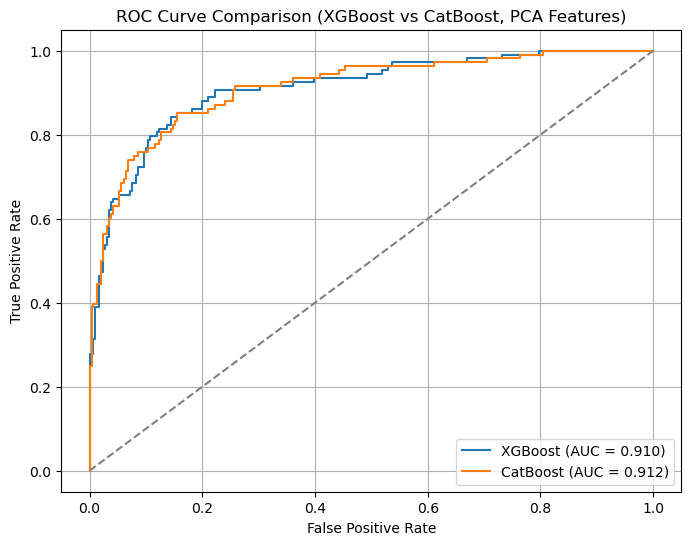

In [115]:
# --- 画ROC曲线 ---
fpr_xgb_pca, tpr_xgb_pca, _ = roc_curve(y_test, y_proba_xgb_pca)
fpr_cat_pca, tpr_cat_pca, _ = roc_curve(y_test, y_proba_cat_pca)

plt.figure(figsize=(8,6))
plt.plot(fpr_xgb_pca, tpr_xgb_pca, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb_pca):.3f})')
plt.plot(fpr_cat_pca, tpr_cat_pca, label=f'CatBoost (AUC = {roc_auc_score(y_test, y_proba_cat_pca):.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (XGBoost vs CatBoost, PCA Features)')
plt.legend()
plt.grid(True)
plt.show()
